<h1>Looking at Correlations Between Variables Using Python</h1>

<h2>1. Import Libraries and Data</h2>

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#  This ensures that graphs will appear in the same notebook and not in separate window
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # This adjust the configuration of that plot that will be created

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv(r'/Users/elizabeth/Documents/GitHub/Movies/Data/Raw/movies.csv')

<h2>2. Initial Data Inspection</h2>

In [2]:
# Initial look at the dataset

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# Looking at the top 5 rows

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Looking at the last 5 rows

df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [5]:
# Looking at the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# List the numerical columns

float_cols = df.select_dtypes(include=['float64']).columns.tolist()
print(float_cols)

['score', 'votes', 'budget', 'gross', 'runtime']


<h2>3. Data Cleaning and Inspection</h2>

In [7]:
# Looking for missing data

missing_values = df.isnull().sum()

missing_percent = round(missing_values / len(df) * 100, 2)
print(missing_percent)

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64


In [8]:
# Impute the missing data in the numerical columns using the mean

df['score'].fillna(df['score'].mean(),inplace=True)
df['votes'].fillna(df['votes'].mean(),inplace=True)
df['budget'].fillna(df['budget'].mean(),inplace=True)
df['gross'].fillna(df['gross'].mean(),inplace=True)
df['runtime'].fillna(df['runtime'].mean(),inplace=True)

missing_values = df.isnull().sum()

missing_percent = round(missing_values / len(df) * 100, 2)
print(missing_percent)

name        0.00
rating      1.00
genre       0.00
year        0.00
released    0.03
score       0.00
votes       0.00
director    0.00
writer      0.04
star        0.01
country     0.04
budget      0.00
gross       0.00
company     0.22
runtime     0.00
dtype: float64


In [9]:
# Drop the remaining rows that contain null data as the amount of missing data is small
df.dropna(inplace=True)





In [10]:
# Drop the remaining rows that contain null data as the amount of missing data is small
df.dropna(inplace=True)

missing_values = df.isnull().sum()

missing_percent = round(missing_values / len(df) * 100, 2)
print(missing_percent)

name        0.0
rating      0.0
genre       0.0
year        0.0
released    0.0
score       0.0
votes       0.0
director    0.0
writer      0.0
star        0.0
country     0.0
budget      0.0
gross       0.0
company     0.0
runtime     0.0
dtype: float64


In [11]:
# Looking at the data types

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [12]:
# Changing the data types of columns to be more appropriate 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

print(df.dtypes[['budget', 'gross']])


budget    int64
gross     int64
dtype: object


> The year in the 'year' and 'released' columns should match, but sometimes don't. Let's fix that.

In [13]:
# Extract the year from the released column and creating a column with the correct year

df['released'] = df['released'].astype('str')

df['yearcorrect'] = df["released"].apply(lambda x: x[x.find(",")+1:x.find("(")] if ("," in x) and ("(" in x) else "")

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400000,2.400000e+03,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000000,2.940000e+02,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600000,3.500000e+01,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0,2020
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.400000,4.470000e+02,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0,2020


In [14]:
# Order the df by gross revenue

df = df.sort_values(by=['gross'], inplace=False,ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020


In [15]:
# Drop duplicates if they exist

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020


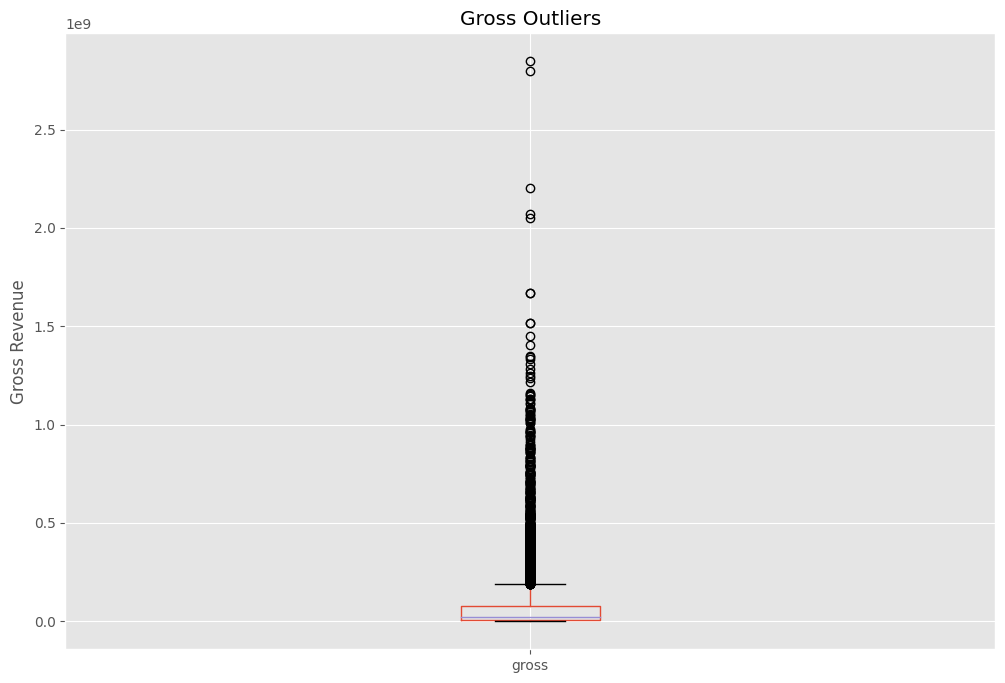

In [16]:
# Check for outliers in the gross column

df.boxplot(column=['gross'])
plt.title('Gross Outliers')
plt.ylabel( 'Gross Revenue' )
plt.show()


<h2>4. Data Correlations</h2>

<h3>4.1 Hypothesis</h3>

My hypothesis is that:
1. The budget will have a high correlation to the gross revenue
2. The company will have a high correlation to the gross revenue

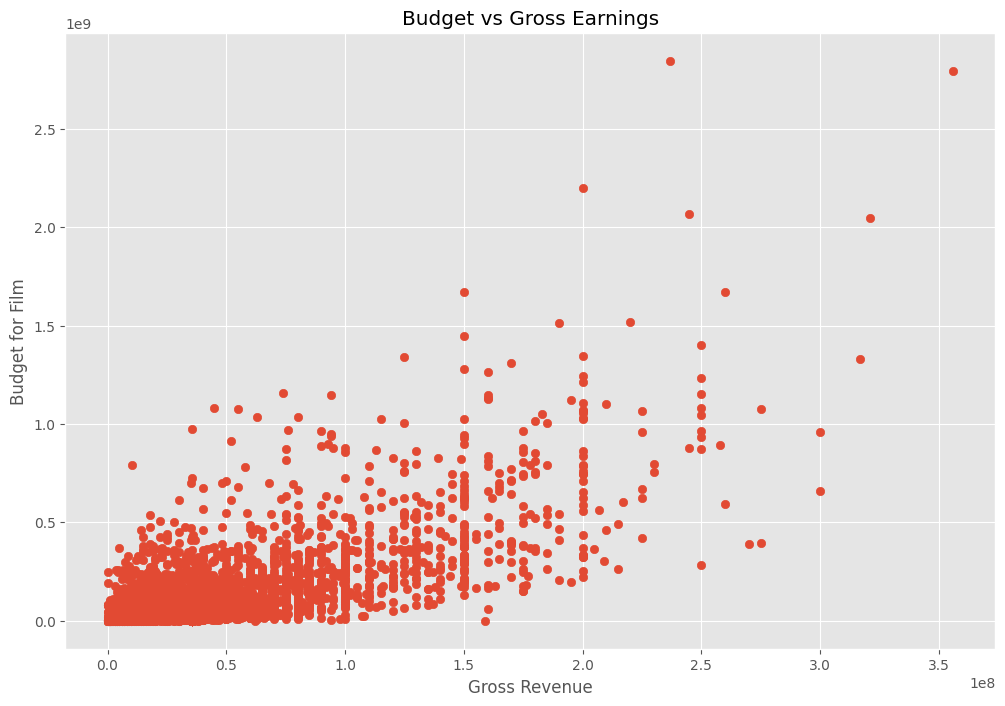

In [17]:
# Plot budget vs gross using a scatterplot

plt.scatter(x=df ['budget'], y=df ['gross']) 
plt.title('Budget vs Gross Earnings')
plt.xlabel( 'Gross Revenue' ) 
plt.ylabel('Budget for Film')
plt.show()

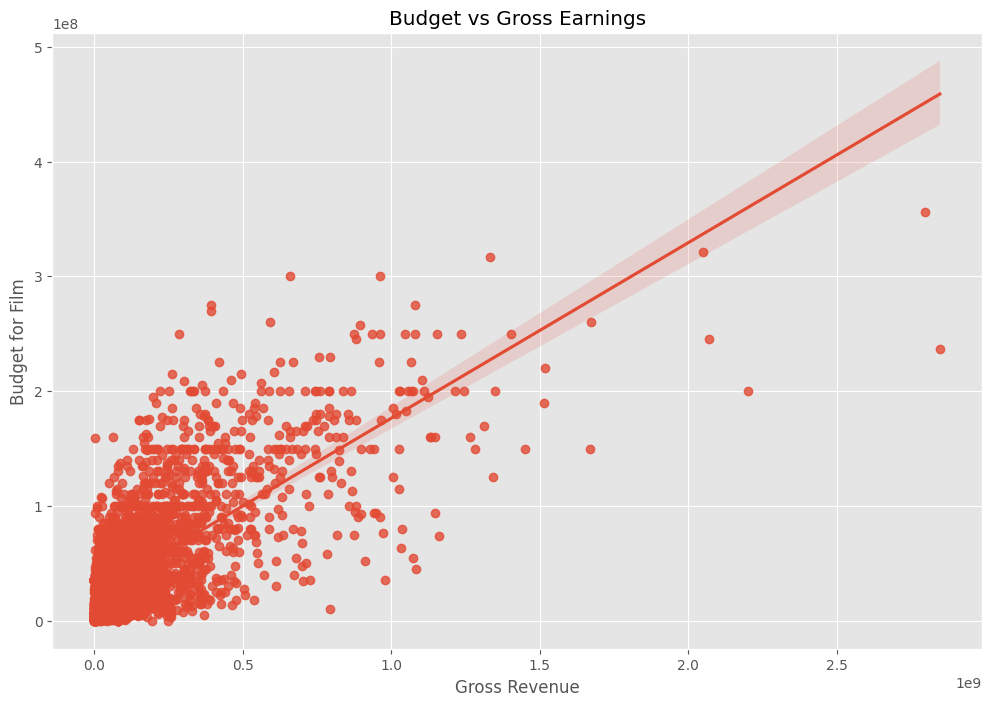

In [18]:
# Plot budget vs gross using a seaborn to see the linear regression model fit between the two variables
sns.regplot(x="gross", y="budget", data=df)
plt.title('Budget vs Gross Earnings')
plt.xlabel( 'Gross Revenue' ) 
plt.ylabel('Budget for Film')
plt.show()

<h3>4.2 Looking at the correlation matrix between all numeric columns</h3>

In [19]:
# 1. Pearson

numeric_cols = df.select_dtypes(include=np.number)

pearson = numeric_cols.corr(method='pearson')
pearson = pearson.reindex(['budget', 'score', 'votes', 'gross', 'runtime'], axis=1)
pearson = pearson.reindex(['budget', 'score', 'votes', 'gross', 'runtime'])
pearson


,budget,score,votes,gross,runtime
budget,1.000000,0.064654,0.421218,0.712561,0.265934
score,0.064654,1.000000,0.411938,0.185084,0.400526
votes,0.421218,0.411938,1.000000,0.629325,0.309353
gross,0.712561,0.185084,0.629325,1.000000,0.241618
runtime,0.265934,0.400526,0.309353,0.241618,1.000000


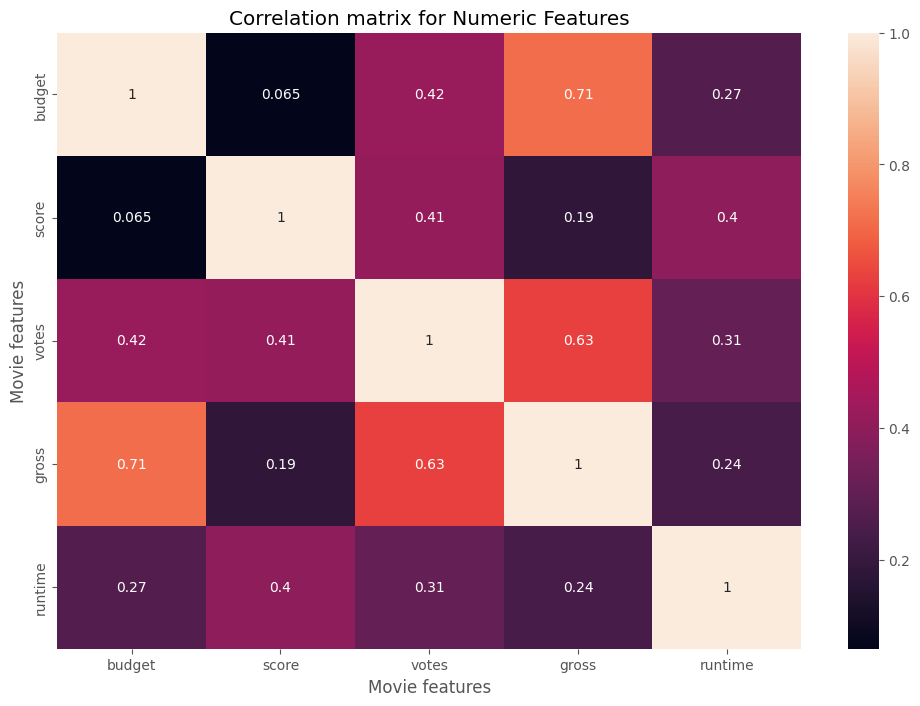

In [20]:
# Plot the correlation matrix for 'pearson'

sns.heatmap(pearson, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [21]:
# 2. Kendall

kendall = numeric_cols.corr(method='kendall')

kendall = kendall.reindex(['budget', 'score', 'votes', 'gross', 'runtime'], axis=1)
kendall = kendall.reindex(['budget', 'score', 'votes', 'gross', 'runtime'])

kendall

,budget,score,votes,gross,runtime
budget,1.000000,0.002838,0.166428,0.263041,0.162957
score,0.002838,1.000000,0.303963,0.083285,0.284044
votes,0.166428,0.303963,1.000000,0.513297,0.198416
gross,0.263041,0.083285,0.513297,1.000000,0.157671
runtime,0.162957,0.284044,0.198416,0.157671,1.000000


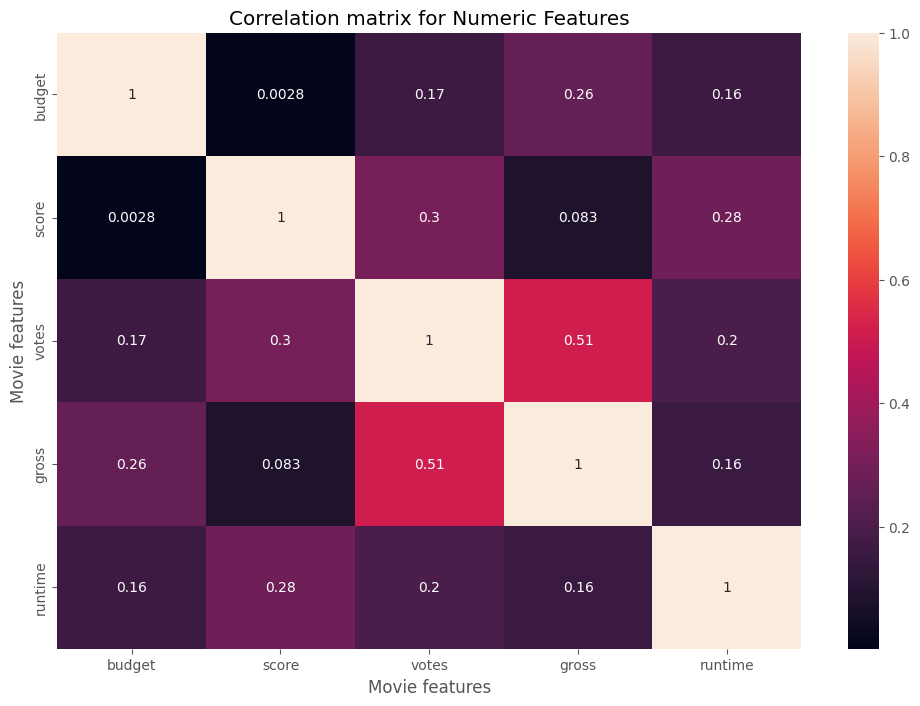

In [22]:
# Plot the correlation matrix for 'kendall'

sns.heatmap(kendall, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [23]:
# 3. Spearman

spearman = numeric_cols.corr(method='spearman')

spearman = spearman.reindex(['budget', 'score', 'votes', 'gross', 'runtime'], axis=1)
spearman = spearman.reindex(['budget', 'score', 'votes', 'gross', 'runtime'])

spearman

,budget,score,votes,gross,runtime
budget,1.000000,0.003744,0.241570,0.368012,0.229821
score,0.003744,1.000000,0.433408,0.122304,0.400508
votes,0.241570,0.433408,1.000000,0.696280,0.290614
gross,0.368012,0.122304,0.696280,1.000000,0.230240
runtime,0.229821,0.400508,0.290614,0.230240,1.000000


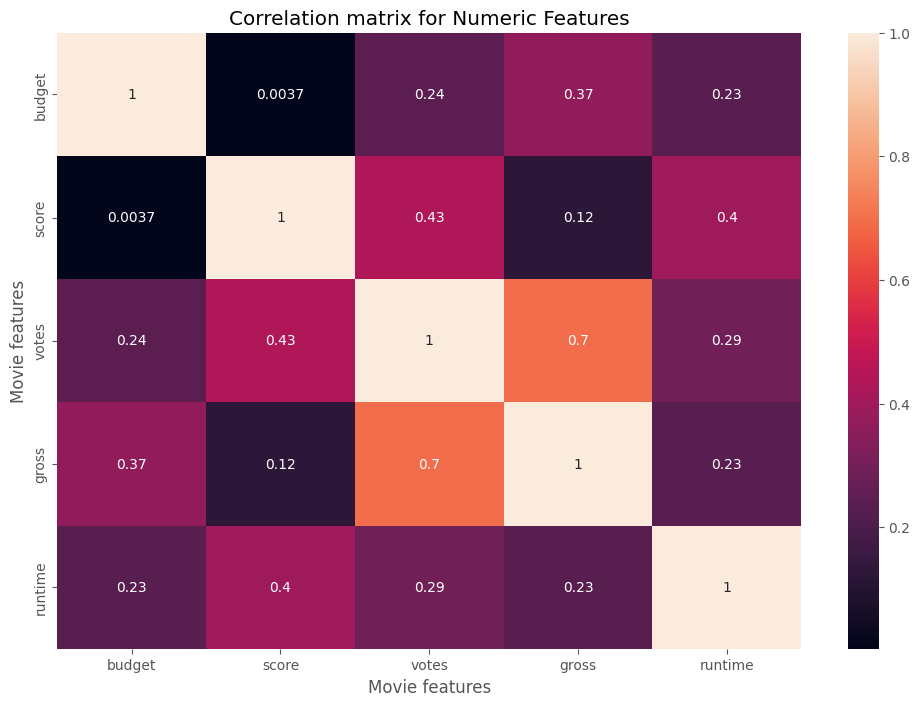

In [24]:
# Plot the correlation matrix for 'spearman'

sns.heatmap(spearman, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

>When looking at pearson correlation, there is a high correlation between budget and gross revenue 0.71. This mean the hypothesis is correct when looking at pearson correlation.

<h3>4.3 Looking at the correlation between all the columns</h3>

In [25]:
# Convert all columns to numerical columns, with each category assigned a unique code

df_num = df

for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,688,7.8,1100000.0,1137,1757,2284,55,237000000,2847246203,2209,162.0,30
7445,529,5,0,2019,180,8.4,903000.0,160,730,2193,55,356000000,2797501328,1572,181.0,40
3045,6813,5,6,1997,696,7.8,1100000.0,1137,1757,1560,55,200000000,2201647264,2209,194.0,18
6663,5077,5,0,2015,690,7.8,876000.0,1107,2519,508,55,245000000,2069521700,1506,138.0,36
7244,530,5,0,2018,189,8.4,897000.0,160,730,2193,55,321000000,2048359754,1572,149.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,2996,6.1,2900.0,1919,1260,2113,54,35589876,1672,1830,87.0,19
2906,4340,3,5,1996,518,7.4,37000.0,2014,1934,1473,11,35589876,1605,327,110.0,17
3818,3320,6,4,2000,1103,6.5,5200.0,717,1105,2269,54,35589876,1400,463,103.0,22
7580,4602,3,5,2019,1814,5.2,735.0,1423,2177,2229,55,35589876,682,1949,93.0,41


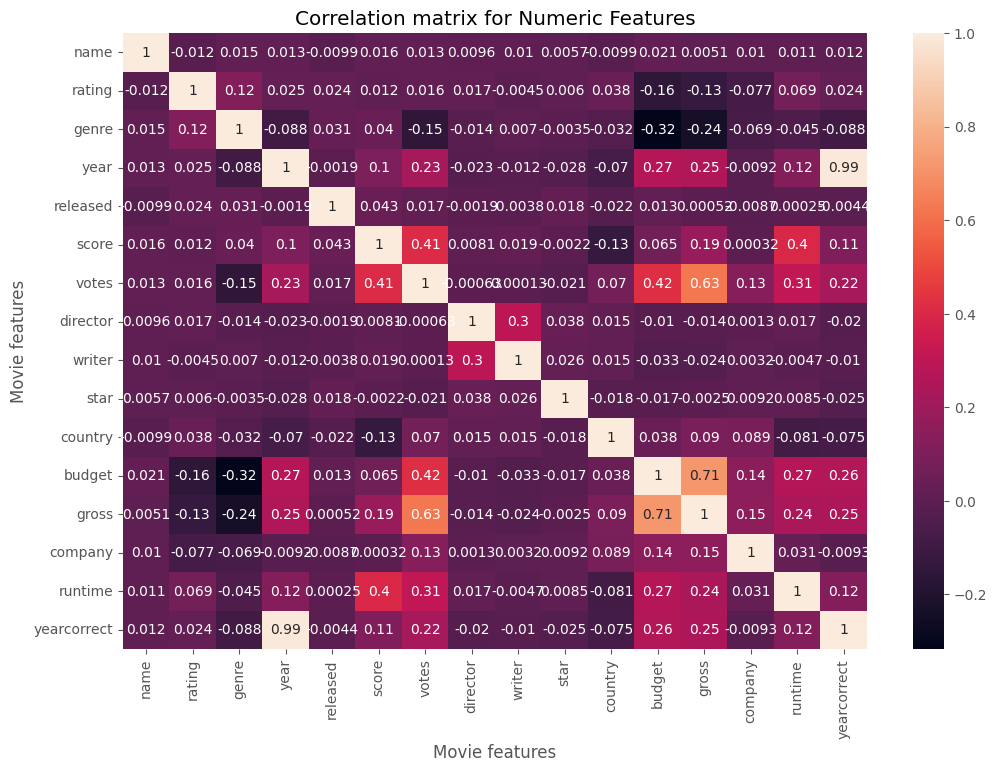

In [26]:
# Plot the correlation matrix for 'pearson'

correlation_matrix = df_num.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

>There is not a high correlation between budget and company. Therefore this second hypothesis is false.

<h3>4.3.1 Looking at the pairs of variables with the highest correlation</h3>

In [27]:
# Inspect the unstacked matrix

corr_pairs = correlation_matrix.unstack()

print(corr_pairs)

name         name           1.000000
             rating        -0.011944
             genre          0.015250
             year           0.013483
             released      -0.009936
                              ...   
yearcorrect  budget         0.262555
             gross          0.248493
             company       -0.009261
             runtime        0.121337
             yearcorrect    1.000000
Length: 256, dtype: float64


In [28]:
# Sort the matrix from lowest to highest correlation

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        budget        -0.316818
budget       genre         -0.316818
genre        gross         -0.238240
gross        genre         -0.238240
budget       rating        -0.156385
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [29]:
# Filter to include the pairs with a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)





votes        gross          0.629325
gross        votes          0.629325
             budget         0.712561
budget       gross          0.712561
yearcorrect  year           0.993174
year         yearcorrect    0.993174
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64
